## Support Vector Machine (SVM)

Las Maquinas de Soporte Vectorial (Support Vector Machine) son discriminadores lineales propuesto para problemas de clasificación binaria.

La idea detrás de **`SVM`**: 

- Si aplicamos una función de mapeo no lineal a un espacio dimensional lo suficientemente alto, los datos provenientes de 2 clases siempre serán separables por un hiperplano.


- **`SVM`** abstraen una frontera de decisión en un espacio multidimensional utilizando un sub-conjunto apropiado de patrones del conjunto de entrenamiento. Este sub-conjunto de patrones son los vectores de soporte.


- Geométricamente los vectores de soporte son los patrones de entrenamiento que se encuentran más cerca de la frontera de decisión.


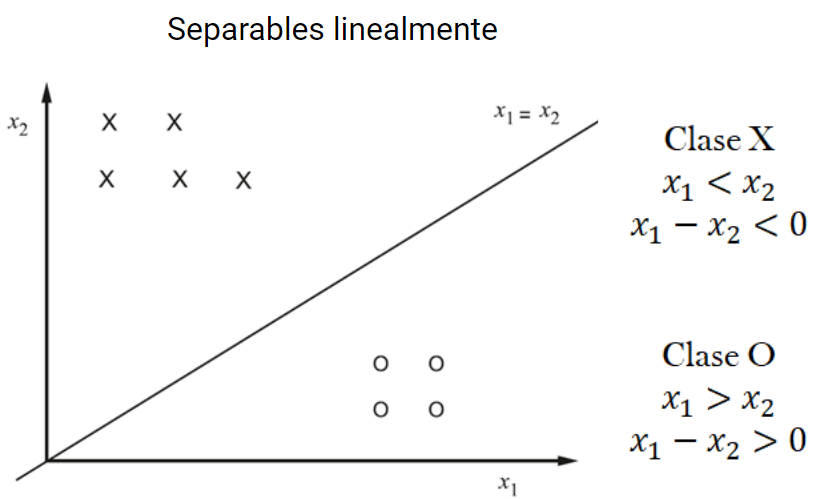


- **Transformación lineal:**

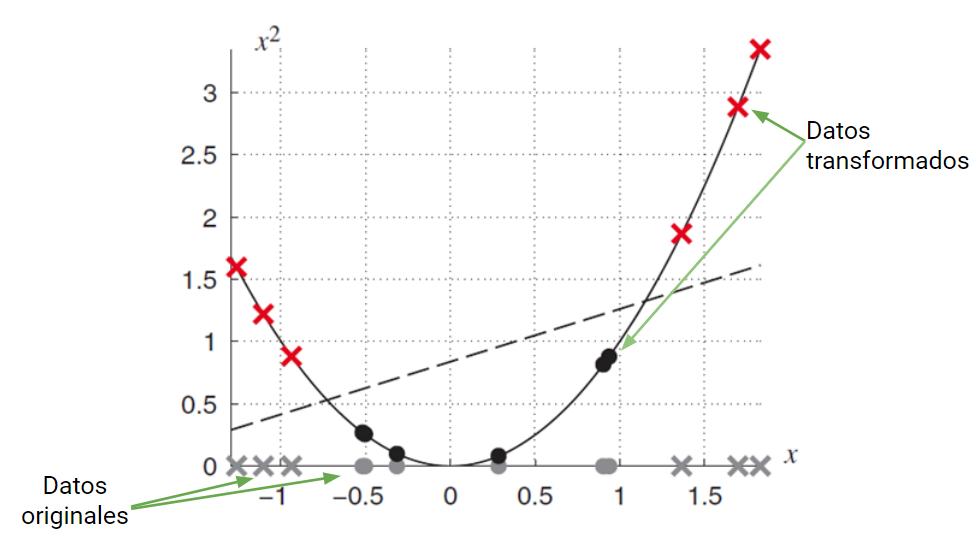

- **Ejemplo de SVM**:

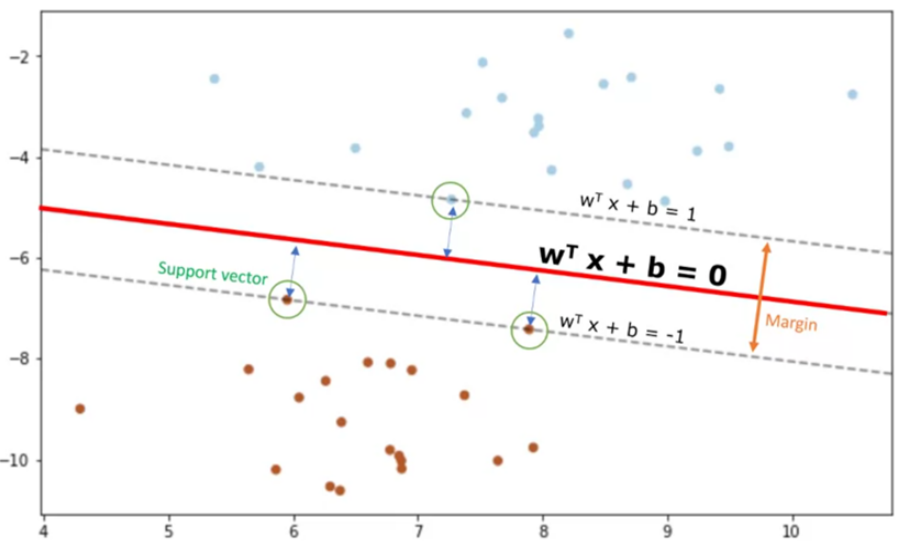

Si no existe tal superficie de separación, los datos serán transformados a un espacio con una dimensionalidad mayor. Esta transformación se hará mediante proyecciones matemáticas adecuadas (funciones Kernel).

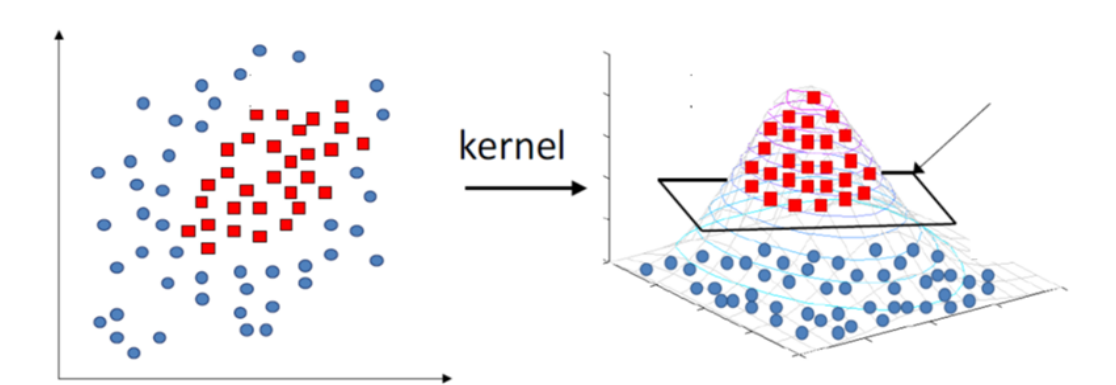

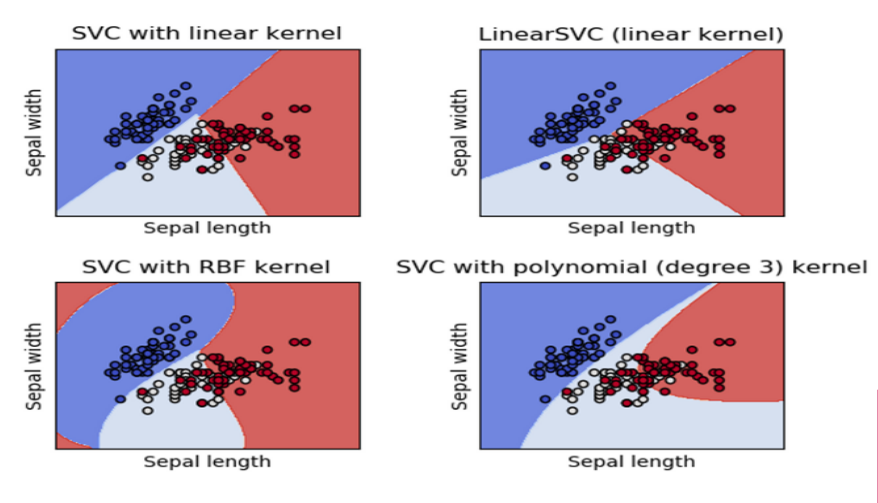

- Ventajas de SVM:
    - Son robustas a una gran cantidad de variables y a una cantidad pequeña de muestras (más columnas que filas).
    - Emplean modelos matemáticos sofisticados para evitar sobre entrenamiento.
    - Suele utilizarse para la detección de **`SPAM`**.
    - Es un clasificador eficiente.


_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases y solo las primeras 2 columnas

### Preprocesamiento

In [3]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.2962963 , 0.625     ],
       [0.22222222, 0.41666667],
       [0.14814815, 0.5       ],
       [0.11111111, 0.45833333],
       [0.25925926, 0.66666667],
       [0.40740741, 0.79166667],
       [0.11111111, 0.58333333],
       [0.25925926, 0.58333333],
       [0.03703704, 0.375     ],
       [0.22222222, 0.45833333],
       [0.40740741, 0.70833333],
       [0.18518519, 0.58333333],
       [0.18518519, 0.41666667],
       [0.        , 0.41666667],
       [0.55555556, 0.83333333],
       [0.51851852, 1.        ],
       [0.40740741, 0.79166667],
       [0.2962963 , 0.625     ],
       [0.51851852, 0.75      ],
       [0.2962963 , 0.75      ],
       [0.40740741, 0.58333333],
       [0.2962963 , 0.70833333],
       [0.11111111, 0.66666667],
       [0.2962963 , 0.54166667],
       [0.18518519, 0.58333333],
       [0.25925926, 0.41666667],
       [0.25925926, 0.58333333],
       [0.33333333, 0.625     ],
       [0.33333333, 0.58333333],
       [0.14814815, 0.5       ],
       [0.

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### Modelo

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC(probability = True)
model.fit(X_train, y_train)

# probability = True para poder usar .predict_proba(), esto puede hacer que el algoritmo sea más lento

SVC(probability=True)

### Predicciones

In [7]:
yhat = model.predict(X_test)

yhat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [8]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [9]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[17,  0],
       [ 0, 13]], dtype=int64)

### Atributos y Métodos

In [10]:
# .predict_proba()

model.predict_proba(X_test)

# Solo se puede usar si probability = True

array([[0.00487626, 0.99512374],
       [0.00477322, 0.99522678],
       [0.0575125 , 0.9424875 ],
       [0.95438186, 0.04561814],
       [0.99083867, 0.00916133],
       [0.98883782, 0.01116218],
       [0.97603338, 0.02396662],
       [0.00385308, 0.99614692],
       [0.99017082, 0.00982918],
       [0.99235932, 0.00764068],
       [0.97196593, 0.02803407],
       [0.9770792 , 0.0229208 ],
       [0.00624206, 0.99375794],
       [0.96706602, 0.03293398],
       [0.00445455, 0.99554545],
       [0.99311945, 0.00688055],
       [0.04278801, 0.95721199],
       [0.02424868, 0.97575132],
       [0.95438186, 0.04561814],
       [0.94650156, 0.05349844],
       [0.00572213, 0.99427787],
       [0.04182959, 0.95817041],
       [0.99133827, 0.00866173],
       [0.9781589 , 0.0218411 ],
       [0.00325263, 0.99674737],
       [0.91243937, 0.08756063],
       [0.99307911, 0.00692089],
       [0.01064276, 0.98935724],
       [0.96545741, 0.03454259],
       [0.02110163, 0.97889837]])

In [11]:
# .support_vectors_ vectores de soportes generados por el modelo

model.support_vectors_

array([[0.22222222, 0.45833333],
       [0.25925926, 0.41666667],
       [0.03703704, 0.375     ],
       [0.44444444, 0.625     ],
       [0.07407407, 0.125     ],
       [0.22222222, 0.41666667],
       [0.40740741, 0.58333333],
       [0.55555556, 0.83333333],
       [0.62962963, 0.58333333],
       [0.48148148, 0.41666667],
       [1.        , 0.5       ],
       [0.7037037 , 0.08333333],
       [0.22222222, 0.16666667],
       [0.33333333, 0.29166667],
       [0.40740741, 0.41666667],
       [0.25925926, 0.        ]])

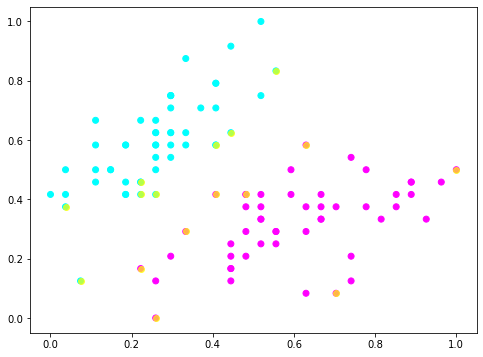

In [12]:
plt.figure(figsize = (8, 6))

# Puntos de entrenamiento (Train)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = "cool")

# Puntos de prueba (Test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = "cool")

# Vecores de Soporte (SVM)
vectores_soporte = model.support_vectors_

plt.plot(vectores_soporte[:, 0], vectores_soporte[:, 1], color = "yellow", marker = "o", linestyle = "", alpha = 0.7)

plt.show()

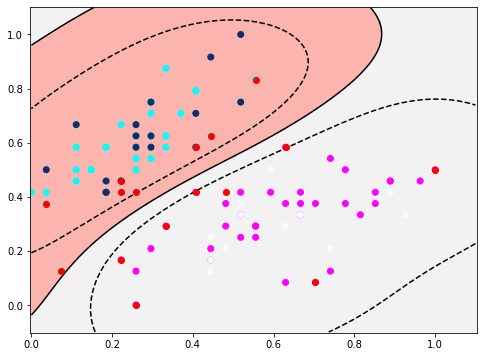

In [13]:
# Clasificación Binaria con 2 columnas

plt.figure(figsize = (8, 6))

# Limites del grafico
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Creacion de la malla
XX, YY = np.mgrid[x_min : x_max + 0.1 : 200j, y_min - 0.1 : y_max + 0.1 : 200j]

# Calculo del componente Z
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Plot Malla
plt.pcolormesh(XX, YY, Z > 0, cmap = "Pastel1", shading = "auto")
plt.contour(XX, YY, Z, colors = ["black", "black", "black"], linestyles = ["--", "-", "--"], levels = [-.5, 0, .5])

# Puntos de Train
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = "cool")

# Puntos de Test
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = "Blues_r")

# Maquinas de Soporte
plt.plot(model.support_vectors_[:, 0], model.support_vectors_[:, 1], "ro")

plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset de **`titanic_preprocesamiento.csv`** para practicar este modelo.
    - Prueba con los diferentes kernels:
        1. **linear** (transformación lineal)
        2. **poly** (transformación polinómica)
        3. **rbf** (Radial Basis Function, transformación radial)
        4. **sigmoid** (transformación sigmoidal)
        5. **precomputed** (se usa cuando tenemos el kernel ya calculado. Omitir este tipo de kernel para el ejercicio)

In [57]:
df = pd.read_csv("titanic_preprocesamiento.csv")
df.head(3)

,Age,Pclass,Fare,Fare-Binning,Age-Binning,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other,Survived
0,22.0,3.0,7.2500,2.0,1.0,0,1,1,0,0,1,0,0,0.0
1,38.0,1.0,71.2833,2.0,0.0,1,0,0,1,0,0,1,0,1.0
2,26.0,3.0,7.9250,2.0,1.0,1,0,0,1,1,0,0,0,1.0


In [58]:
X = np.array(df.drop(["Survived", "Fare-Binning", "Age-Binning"], axis = 1))

y = np.array(df["Survived"])

X.shape, y.shape

((888, 11), (888,))

In [59]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.27117366, 1.        , 0.02756654, ..., 1.        , 0.        ,
        0.        ],
       [0.4722292 , 0.        , 0.27103916, ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 1.        , 0.03013308, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34656949, 1.        , 0.0891635 , ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.        , 0.11406844, ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 1.        , 0.02946768, ..., 1.        , 0.        ,
        0.        ]])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (621, 11), y_train: (621,)
X_test: (267, 11),  y_test: (267,)


In [61]:
def support_VM(forma):
    
    model = SVC(kernel = forma, probability = True)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    
    print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
    print("Accuracy:"     , accuracy_score(y_test, yhat))
    print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
    print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
    print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
    print("ROC AUC:", roc_auc_score(y_test, yhat))

In [62]:
support_VM("linear")

Jaccard Index: 0.6774569845435987
Accuracy: 0.8164794007490637
Precisión: 0.812160367105422
Sensibilidad: 0.8019859813084111
F1-score: 0.8060197197716658
ROC AUC: 0.8019859813084113


In [63]:
support_VM("poly")

Jaccard Index: 0.68303264604811
Accuracy: 0.8239700374531835
Precisión: 0.8304959527174611
Sensibilidad: 0.8004964953271028
F1-score: 0.8093233859571817
ROC AUC: 0.8004964953271028


In [64]:
support_VM("rbf")

Jaccard Index: 0.6738700029487341
Accuracy: 0.8164794007490637
Precisión: 0.8178907721280603
Sensibilidad: 0.7957943925233645
F1-score: 0.8029342210305925
ROC AUC: 0.7957943925233644


In [65]:
support_VM("sigmoid")

Jaccard Index: 0.5594760569379859
Accuracy: 0.7265917602996255
Precisión: 0.7152818469471464
Sensibilidad: 0.7146028037383177
F1-score: 0.7149313325435479
ROC AUC: 0.7146028037383176
